## First Demo

This demo will showcase the feature estimation and example analysis using simulated data.

In [1]:
import py_neuromodulation as py_nm

from py_neuromodulation import (
    nm_analysis,
    nm_decode,
    nm_define_nmchannels,
    nm_plots
    
)
import numpy as np
from matplotlib import pyplot as plt

### Data Simulation

We will now generate some example data of 5 seconds, for 6 channels with a sample rate of 1kHz. 

In [2]:
def generate_random_walk(NUM_CHANNELS, TIME_DATA_SAMPLES):
    # from https://towardsdatascience.com/random-walks-with-python-8420981bc4bc
    dims = NUM_CHANNELS
    step_n = TIME_DATA_SAMPLES-1
    step_set = [-1, 0, 1]
    origin = (np.random.random([1,dims])-0.5)*1 # Simulate steps in 1D
    step_shape = (step_n,dims)
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    return path.T

In [3]:
NUM_CHANNELS = 6
sfreq = 1000
TIME_DATA_SAMPLES = 5 * sfreq
data = generate_random_walk(NUM_CHANNELS, TIME_DATA_SAMPLES)
time = np.arange(0, TIME_DATA_SAMPLES/sfreq, 1/sfreq)

Text(0.5, 1.0, 'Example random walk data')

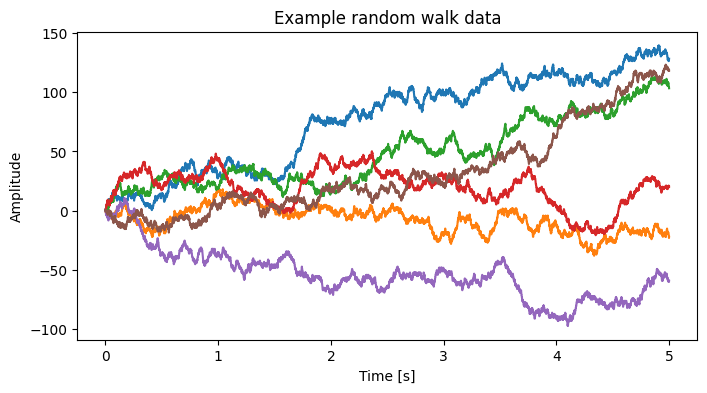

In [4]:
plt.figure(figsize=(8,4), dpi=100)
for ch_idx in range(data.shape[0]):
    plt.plot(time, data[ch_idx, :])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Example random walk data")

Now let's define the necessary setup files will be use for data preprocessing and feature estimation. 
py_neuromodulation is based on two parametrization files: the *nm_channels.tsv* and the *nm_setting.json*.

### nm_channels

The *nm_channel* dataframe contains the following columns:

| Column name | Description |
| --- | --- | 
|**name** | name of the channel
|**rereference** | different channel name for bipolar rereferencing, or average for common average rereferencing
|**used** | 0 or 1, channel selection 
|**target** | 0 or 1, for some decoding applications we can define target channls, e.g. EMG channels
|**type** | channel type according to the mne-python toolbox (https://mne.tools/stable/auto_tutorials/raw/10_raw_overview.html#sphx-glr-auto-tutorials-raw-10-raw-overview-py), e.g. ecog, eeg, ecg, emg, dbs, seeg etc.  
|**status** | good or bad, used for channel quality indication
|**new_name** | this keyword can be specified to indicate for example the used rereferencing scheme

The nm_stream can either created as a *.tsv* text file, or as a pandas dataframe. There are some helper function that let you create the nm_channels without much effort: 

In [5]:
nm_channels = nm_define_nmchannels.get_default_channels_from_data(data, car_rereferencing=True)

nm_channels

,name,rereference,used,target,type,status,new_name
0,ch0,average,1,0,ecog,good,ch0-avgref
1,ch1,average,1,0,ecog,good,ch1-avgref
2,ch2,average,1,0,ecog,good,ch2-avgref
3,ch3,average,1,0,ecog,good,ch3-avgref
4,ch4,average,1,0,ecog,good,ch4-avgref
5,ch5,average,1,0,ecog,good,ch5-avgref


Using this function, default channel names and a common average rereference scheme is specified. Alternatively the *nm_define_nmchannels.set_channels* function can be used to pass each column values.

### nm_settings

Next, we will initialize the nm_settings dictionary and use the default settings, reset them, and enable a subset of features:

In [6]:
settings = py_nm.nm_settings.get_default_settings()
settings = py_nm.nm_settings.reset_settings(settings)
settings

{'sampling_rate_features_hz': 10,
 'segment_length_features_ms': 1000,
 'preprocessing': [],
 'documentation_preprocessing_options': ['raw_resampling',
  'notch_filter',
  're_referencing',
  'raw_normalization'],
 'features': {'raw_hjorth': False,
  'return_raw': False,
  'bandpass_filter': False,
  'stft': False,
  'fft': False,
  'sharpwave_analysis': False,
  'fooof': False,
  'bursts': False,
  'linelength': False,
  'coherence': False,
  'nolds': False,
  'mne_connectivity': False},
 'postprocessing': {'feature_normalization': False,
  'project_cortex': False,
  'project_subcortex': False},
 'raw_resampling_settings': {'resample_freq_hz': 1000},
 'documentation_normalization_options': ['mean',
  'median',
  'zscore',
  'zscore-median',
  'quantile',
  'power',
  'robust',
  'minmax'],
 'raw_normalization_settings': {'normalization_time_s': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'feature_normalization_settings': {'normalization_time_s': 30,
  'normalization_method'

The settings itself is a .json file which contains the parametrization for processing, feature estimation, postprocessing and defines at which sampling rate features are being calculated. In this example 'sampling_rate_features_hz' is specified to be 10 Hz, so every 100ms a new set of features is calculated.

For many features the 'segment_length_features_ms' specifies the time dimension of the raw signal being used for feature calculation. Here it is specified to be 1000 ms.

We will now enable the features:

* fft
* bursts
* sharpwave

and stay with the default preprcessing methods:

* notch_filter
* re_referencing

and use *z-score* postprocessing normalization.

In [7]:
settings["features"]["fft"] = True
settings["features"]["bursts"] = True
settings["features"]["sharpwave_analysis"] = True

We are now ready to go to instantiate the *Stream* and call the *run* method for feature estimation. The run method can also be given supplied parameters specifying where the output, that we will need for later analysis, is saved.

In [8]:
stream = py_nm.Stream(
    settings=settings,
    nm_channels=nm_channels,
    verbose=True,
    sfreq=sfreq,
    line_noise=50
)

stream.run(data,
           out_path_root="sphinx")

Last batch took: 0.09 seconds
1.0 seconds of data processed
Last batch took: 0.07 seconds
1.1 seconds of data processed
Last batch took: 0.06 seconds
1.2 seconds of data processed
Last batch took: 0.08 seconds
1.3 seconds of data processed
Last batch took: 0.12 seconds
1.4 seconds of data processed
Last batch took: 0.11 seconds
1.5 seconds of data processed
Last batch took: 0.1 seconds
1.6 seconds of data processed
Last batch took: 0.07 seconds
1.7 seconds of data processed
Last batch took: 0.08 seconds
1.8 seconds of data processed
Last batch took: 0.07 seconds
1.9 seconds of data processed
Last batch took: 0.08 seconds
2.0 seconds of data processed
Last batch took: 0.09 seconds
2.1 seconds of data processed
Last batch took: 0.12 seconds
2.2 seconds of data processed
Last batch took: 0.11 seconds
2.3 seconds of data processed
Last batch took: 0.11 seconds
2.4 seconds of data processed
Last batch took: 0.09 seconds
2.5 seconds of data processed
Last batch took: 0.09 seconds
2.6 seconds

,ch0-avgref_fft_theta,ch0-avgref_fft_alpha,ch0-avgref_fft_low beta,ch0-avgref_fft_high beta,ch0-avgref_fft_low gamma,ch0-avgref_fft_high gamma,ch0-avgref_fft_HFA,ch1-avgref_fft_theta,ch1-avgref_fft_alpha,ch1-avgref_fft_low beta,...,ch5-avgref_bursts_high beta_amplitude_max,ch5-avgref_bursts_high beta_burst_rate_per_s,ch5-avgref_bursts_high beta_in_burst,ch5-avgref_bursts_low gamma_duration_mean,ch5-avgref_bursts_low gamma_amplitude_mean,ch5-avgref_bursts_low gamma_duration_max,ch5-avgref_bursts_low gamma_amplitude_max,ch5-avgref_bursts_low gamma_burst_rate_per_s,ch5-avgref_bursts_low gamma_in_burst,time
0,7.078225,6.583069,6.056707,5.299416,4.358329,3.738685,3.074628,6.600190,6.121700,5.726312,...,2.939958,0.011364,0.0,0.004717,0.498390,0.007,1.153334,0.004717,0.0,1000.0
1,7.210777,6.586715,6.183313,5.397840,4.635091,3.932367,3.230935,6.513256,6.147411,5.637090,...,2.939958,0.011682,0.0,0.004686,0.503661,0.006,1.828196,0.004686,1.0,1100.0
2,7.027966,6.407527,5.667245,5.051961,4.490647,3.765412,3.049613,5.781080,5.834232,5.595432,...,2.933000,0.010667,0.0,0.004500,0.461947,0.006,1.175147,0.004500,0.0,1200.0
3,6.996894,6.219001,5.696209,5.031343,4.349407,3.482521,2.813648,6.692204,6.127614,5.380729,...,3.203297,0.010348,0.0,0.004443,0.470091,0.006,1.172356,0.004443,1.0,1300.0
4,6.938587,6.708437,6.116934,5.533398,4.517370,3.848975,3.093326,6.554705,6.267397,5.667989,...,3.129783,0.009318,1.0,0.004509,0.481024,0.006,1.172356,0.004509,0.0,1400.0
5,6.948888,6.469466,5.457541,5.008661,4.139323,3.419503,2.728937,6.652579,6.495582,5.438629,...,2.461040,0.009818,0.0,0.004589,0.505961,0.006,1.617342,0.004589,0.0,1500.0
6,6.893402,6.234075,5.492636,5.148331,4.222655,3.477891,2.781856,6.256537,6.117483,4.776692,...,2.605773,0.010667,1.0,0.004625,0.482862,0.006,1.161196,0.004625,0.0,1600.0
7,6.906582,5.848891,5.582460,5.149907,4.240039,3.467126,2.792101,6.244942,6.105454,4.711159,...,2.419150,0.010857,1.0,0.004593,0.491916,0.006,1.136650,0.004593,0.0,1700.0
8,7.327517,6.658820,6.324024,5.668651,4.736061,4.010359,3.361042,6.237047,6.108663,4.668147,...,3.007563,0.011045,1.0,0.004358,0.468487,0.007,1.206150,0.004358,1.0,1800.0
9,7.157674,6.586742,5.895527,5.750319,4.689200,4.084983,3.440482,6.266071,6.065597,4.827163,...,3.248390,0.012381,0.0,0.004480,0.466431,0.006,0.852803,0.004480,0.0,1900.0


### Feature Analysis

Ok, so there is a lot of output, which we could omit by verbose being False, but let's have a look what was being computed. We will therefore use the nm_analysis class to showcase some functions. For multi-run or subject analyze we will pass here the feature_file "sub" default directory:

In [9]:
analyzer = nm_analysis.Feature_Reader(
    feature_dir="sphinx",
    feature_file="sub"
)


Let's have a look at the resulting dataframe, lying in the "feature_arr" dataframe: 

In [ ]:
analyzer.feature_arr.iloc[:10, :]

Seems like a lot of features were calculated. The 'time' columns tells us about each row time index. For the 6 specified channels, it is each 31 features. We can now use some in-built plotting functions for visualization.

Note: Due to the simulation data, some of the features have constant values, which are not displayed due to image normalization.

In [ ]:
analyzer.plot_all_features(ch_used="ch1")

In [ ]:
nm_plots.plot_corr_matrix(
    figsize=(25,25),
    show_plot=True,
    feature=analyzer.feature_arr,
)
#ax.set_xlabel("Features")
#ax.set_ylabel("Features")

The upper correlation matrix shows the correlation of every feature of every channel to every other.
This notebook demonstrated a first demo how features can quickly be generated. For further feature modalities and decoding applications check out the next notebooks.